# CoT with GPT 4

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# 2. Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model


In [ ]:
# 3. Define dataset paths
base_dir = '/content/drive/MyDrive/Dissertation/FinalDataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [ ]:
# 4. Create data generators
img_size = 128
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 2400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
# 5. Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 6. Compile model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 7. Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 390s 5s/step - accuracy: 0.5055 - loss: 0.7068 - val_accuracy: 0.7133 - val_loss: 0.5933
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7201 - loss: 0.5683 - val_accuracy: 0.6700 - val_loss: 0.6136
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7163 - loss: 0.5600 - val_accuracy: 0.7533 - val_loss: 0.4926
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7591 - loss: 0.4965 - val_accuracy: 0.7833 - val_loss: 0.4793
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 75s 999ms/step - accuracy: 0.7900 - loss: 0.4533 - val_accuracy: 0.7967 - val_loss: 0.4305
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8262 - loss: 0.3952 - val_accuracy: 0.8200 - val_loss: 0.3981
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8480 - loss: 0.3597 - val_accuracy: 0.8367 - val_loss: 0.3754
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8810 - loss: 0.2840 - val_accuracy: 0.8433 - val_

In [ ]:
# 8. Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

final_val_acc = history.history['val_accuracy'][-1]
print(f"\n✅ Final Validation Accuracy: {final_val_acc:.4f}")

best_val_acc = max(history.history['val_accuracy'])
print(f"🌟 Best Validation Accuracy during training: {best_val_acc:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.9147 - loss: 0.2567

✅ Test Accuracy: 0.9000

✅ Final Validation Accuracy: 0.8967
🌟 Best Validation Accuracy during training: 0.9000


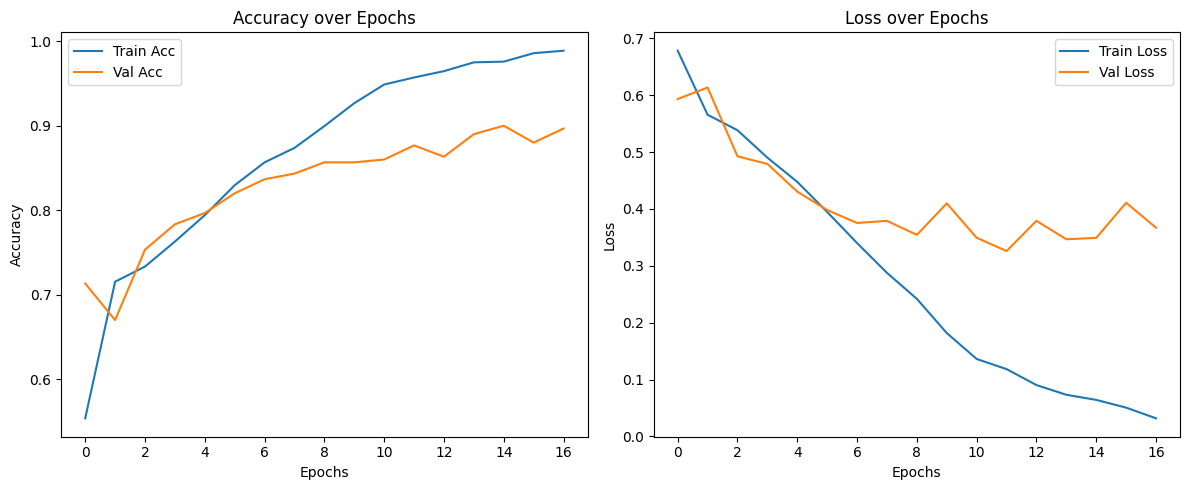

In [ ]:
# 9. Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


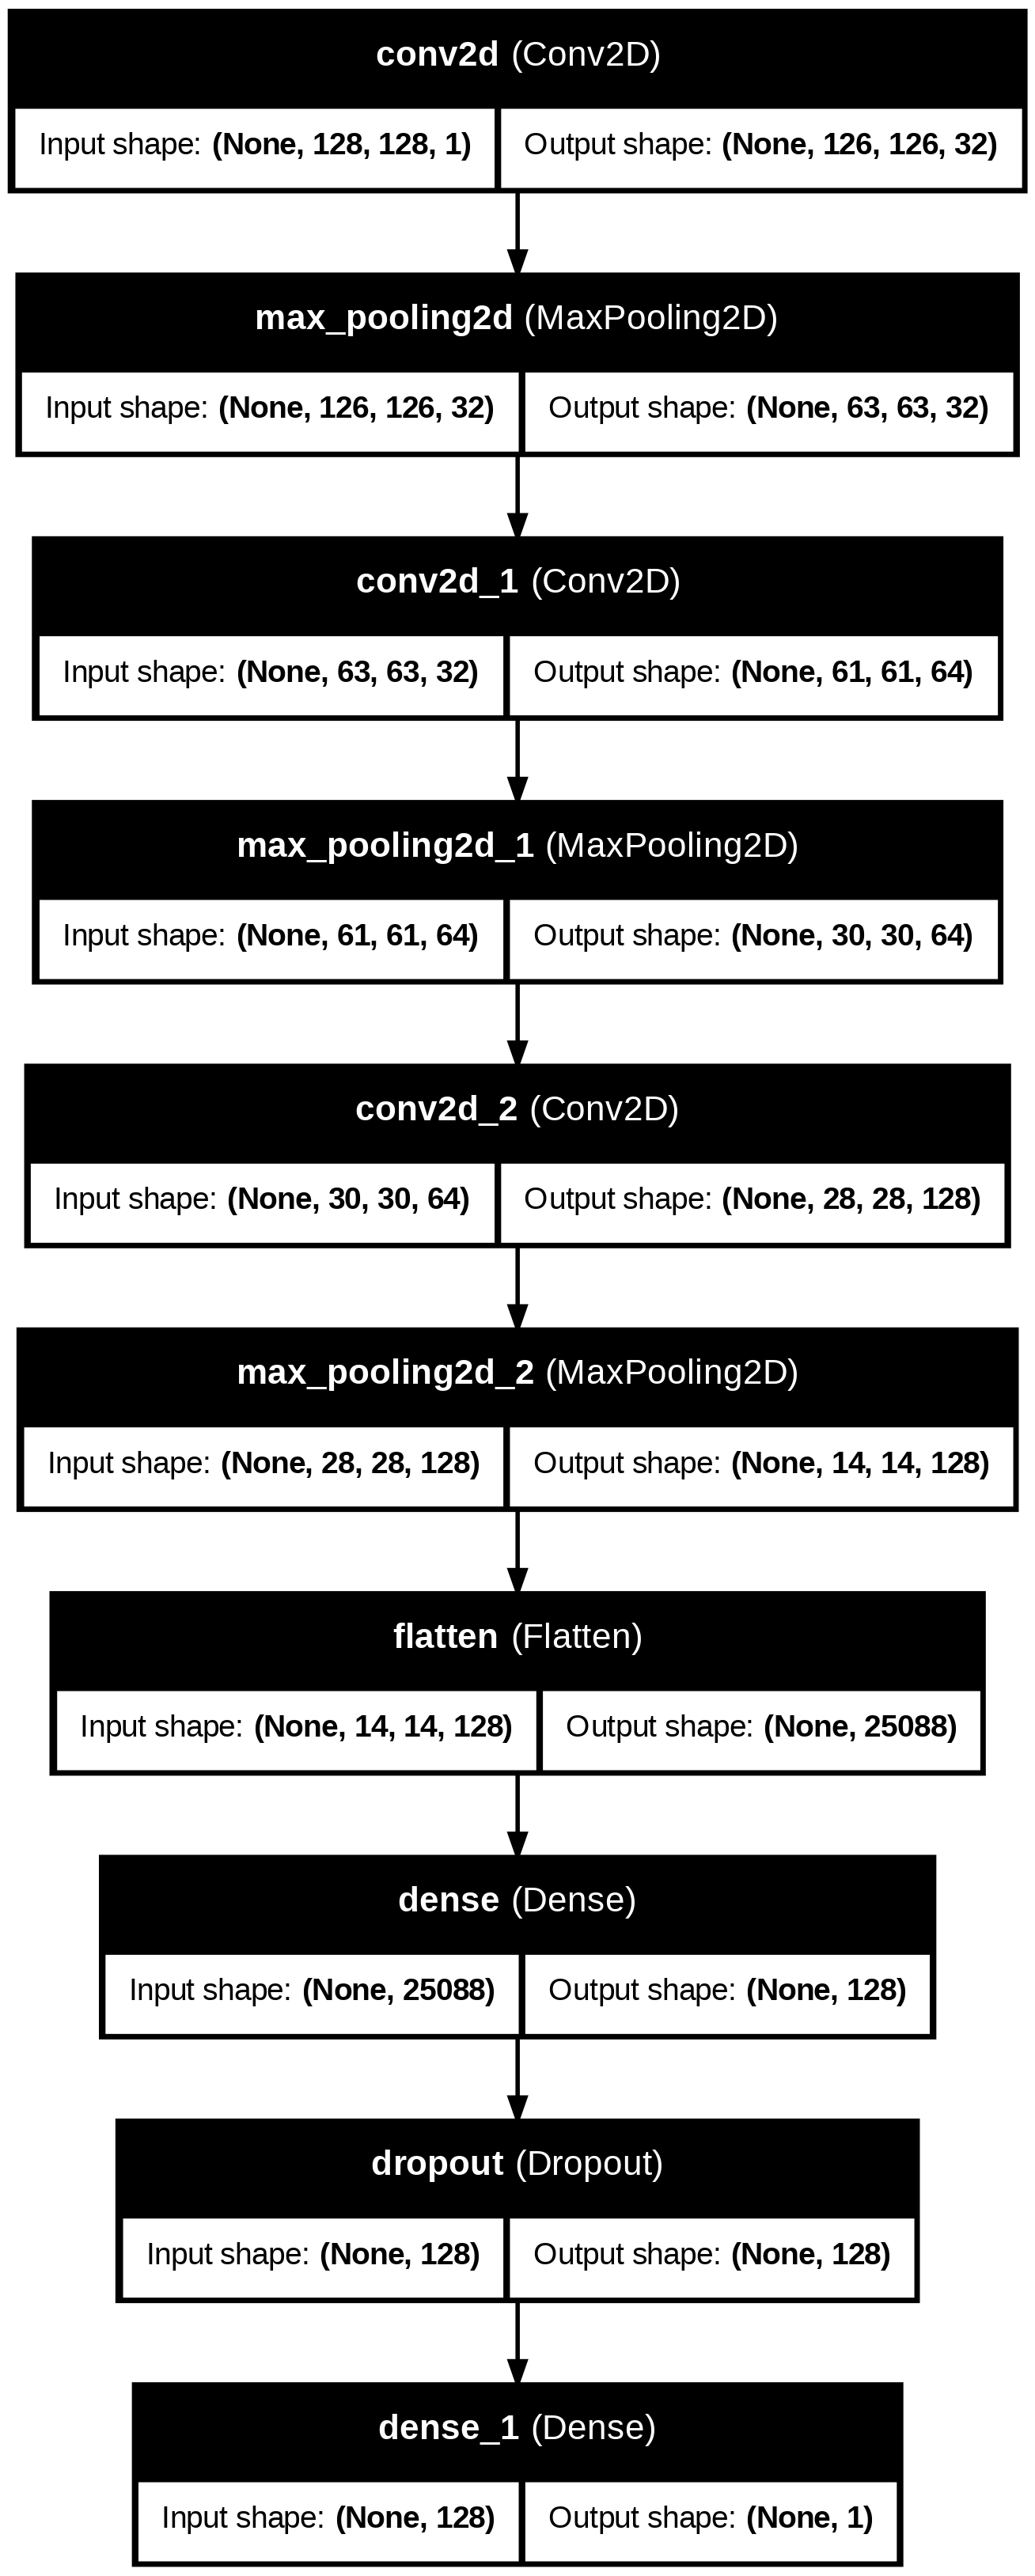

In [ ]:
# 10. Visualize model architecture
plot_model(model, show_shapes=True, show_layer_names=True)


In [ ]:
# 12. Import classification metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


In [ ]:
# 13. Get true and predicted labels
# Predict on test data
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)  # Convert probs to binary labels

# Get true labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # ['Impact', 'Volcanic']


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 380ms/step


In [ ]:
# 14. Print classification report
print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))



🧾 Classification Report:
              precision    recall  f1-score   support

      Impact       0.91      0.89      0.90       150
    Volcanic       0.89      0.91      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


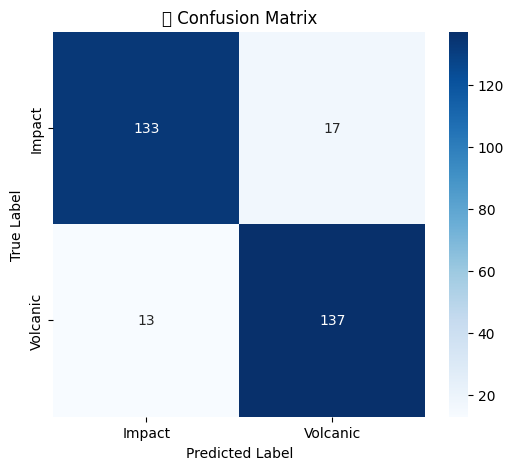

In [ ]:
# 15. Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🧩 Confusion Matrix')
plt.show()


# Save


In [ ]:
# Create folder if it doesn't exist
import os
save_dir = "/content/drive/MyDrive/Dissertation/Models"
os.makedirs(save_dir, exist_ok=True)

# Save model
model.save(os.path.join(save_dir, "EXP_002.h5"))
print(f"Model saved to {os.path.join(save_dir, 'EXP_002.h5')}")

import pickle

# Save history object
with open(os.path.join(save_dir, "EXP_002_history.pkl"), "wb") as f:
    pickle.dump(history.history, f)

print(f"History saved to {os.path.join(save_dir, 'EXP_002_history.pkl')}")


Model saved to /content/drive/MyDrive/Dissertation/Models/EXP_002.h5
History saved to /content/drive/MyDrive/Dissertation/Models/EXP_002_history.pkl
